Name : Kevalya Gupt

PRN Number: 1032210925

Expt Number: 06

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
import zipfile
from google.colab import drive



In [ ]:
%cd  /content/drive/MyDrive/cv6

/content/drive/MyDrive/cv6


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images

train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [ ]:
#we wont apply any pre processimg on the raw images of the test dataset

test_datagen = ImageDataGenerator()

In [ ]:
trainingImagePath = '/content/drive/MyDrive/cv6/Face-Images[1]/Face Images/Final Training Images'
testImagePath = '/content/drive/MyDrive/cv6/Face-Images[1]/Face Images/Final Testing Images'

In [ ]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        trainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 249 images belonging to 17 classes.


In [ ]:

# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        testImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 67 images belonging to 17 classes.


In [ ]:
# Printing class labels for each face
test_set.class_indices

{'face-17': 0,
 'face1': 1,
 'face10': 2,
 'face11': 3,
 'face12': 4,
 'face13': 5,
 'face14': 6,
 'face15': 7,
 'face16': 8,
 'face2': 9,
 'face3': 10,
 'face4': 11,
 'face5': 12,
 'face6': 13,
 'face7': 14,
 'face8': 15,
 'face9': 16}

In [ ]:
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face17', 9: 'face2', 10: 'face3', 11: 'face4', 12: 'face5', 13: 'face6', 14: 'face7', 15: 'face8', 16: 'face9'}

 The Number of output neurons:  17


In [ ]:
# so in our CNN model we would have:
#2 hideen convolutional layers
#2 hidden pooling layers
#16 neurons in the output layer since we have 17 classes
# and 1 flattening layer

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

'''STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

''' ADDITIONAL LAYER of CONVOLUTION for better accuracy'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

''' STEP--3 FLattening'''
classifier.add(Flatten())

'''STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])



# Starting the model training
classifier.fit(
    training_set,
    steps_per_epoch=8,         #number of steps per epoch = (Total number of training samples / Batch size), here i have 244 training images and the batch size is 32, therefore the steps_per_epochs comes out to be 7.6 = 8
    epochs=15,
    validation_data=test_set,
    validation_steps=10
)

Epoch 1/15
8/8 [==============================] - ETA: 0s - loss: 52.1161 - accuracy: 0.0402

8/8 [==============================] - 11s 1s/step - loss: 52.1161 - accuracy: 0.0402 - val_loss: 4.5808 - val_accuracy: 0.0746
Epoch 2/15
8/8 [==============================] - 3s 354ms/step - loss: 3.1334 - accuracy: 0.1165
Epoch 3/15
8/8 [==============================] - 3s 349ms/step - loss: 2.7993 - accuracy: 0.1084
Epoch 4/15
8/8 [==============================] - 5s 593ms/step - loss: 2.6500 - accuracy: 0.1968
Epoch 5/15
8/8 [==============================] - 3s 368ms/step - loss: 2.0638 - accuracy: 0.4217
Epoch 6/15
8/8 [==============================] - 3s 341ms/step - loss: 1.6374 - accuracy: 0.5100
Epoch 7/15
8/8 [==============================] - 3s 403ms/step - loss: 0.8765 - accuracy: 0.7390
Epoch 8/15
8/8 [==============================] - 5s 556ms/step - loss: 0.6752 - accuracy: 0.8273
Epoch 9/15
8/8 [==============================] - 3s 330ms/step - loss: 0.3715 - accuracy: 0.9076
Epoch 10/15
8/8 [==============================] - 3s 373ms/step - loss: 0.2268 - accura

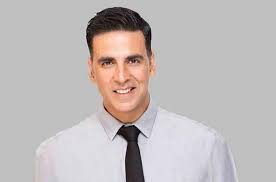

Prediction is:  face17


In [ ]:
from google.colab.patches import cv2_imshow
'''Making single predictions'''
import numpy as np
from keras.preprocessing import image

ImagePath='/content/drive/MyDrive/cv6/Face-Images[1]/Face Images/Final Testing Images/face-17/images (4).jpeg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)

imagepathforoutput=r'/content/drive/MyDrive/cv6/Face-Images[1]/Face Images/Final Testing Images/face-17/images (1).jpeg'
imageforoutput = cv2.imread(imagepathforoutput)
cv2_imshow(imageforoutput)
print('Prediction is: ',ResultMap[np.argmax(result)])